<a href="https://colab.research.google.com/github/Vemulawada-navyasri/Temp/blob/main/copy_of_cricketmatch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ṅ!pip install ultralytics
!pip install opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.8/898.8 kB 13.0 MB/s eta 0:00:00


In [ ]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n.pt')  # Replace with the desired model size


100%|██████████| 6.25M/6.25M [00:00<00:00, 76.3MB/s]


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your image files

image_path = list(uploaded.keys())[0]  # Get the first uploaded image path


Saving Screenshot (1618).png to Screenshot (1618).png
Saving Screenshot (1619).png to Screenshot (1619).png
Saving Screenshot (1620).png to Screenshot (1620).png
Saving Screenshot (1621).png to Screenshot (1621).png


In [ ]:
# Run YOLO detection
results = model.predict(image_path, conf=0.5)  # Adjust confidence as needed



image 1/1 /content/Screenshot (1618).png: 384x640 5 persons, 363.3ms
Speed: 19.9ms preprocess, 363.3ms inference, 38.5ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
# Extract detected objects
detected_objects = results[0].boxes.data.cpu().numpy()

# YOLO class index for 'person' is typically 0
person_count = sum(1 for obj in detected_objects if int(obj[5]) == 0)

print(f"Number of people detected: {person_count}")


Number of people detected: 5


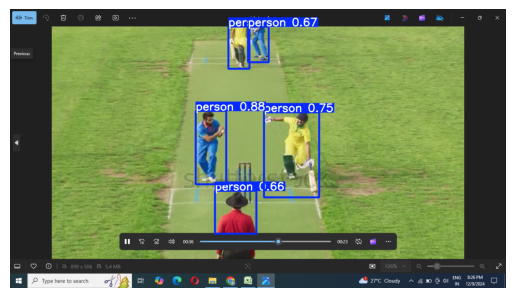

In [ ]:
# Display the image with bounding boxes
annotated_image = results[0].plot()

# Plot the image
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


How many on screen detected and displayes on screen

In [ ]:
import os

# Folder containing images - Update with the correct path
image_folder = '/content/images'  # Example: If images are in a folder named 'images' within '/content/'

# Create the directory if it doesn't exist
os.makedirs(image_folder, exist_ok=True)

# Detect and count people in each image
for image_file in os.listdir(image_folder):
    image_path = os.path.join(image_folder, image_file)
    results = model.predict(image_path, conf=0.5)

    detected_objects = results[0].boxes.data.cpu().numpy()
    person_count = sum(1 for obj in detected_objects if int(obj[5]) == 0)

    print(f"Image: {image_file}, People detected: {person_count}")

In [ ]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload your image
image_path = list(uploaded.keys())[0]


Saving Screenshot (1618).png to Screenshot (1618) (1).png
Saving Screenshot (1619).png to Screenshot (1619) (1).png


In [ ]:
results = model.predict(image_path, conf=0.5)
detected_objects = results[0].boxes.data.cpu().numpy()



image 1/1 /content/Screenshot (1618) (1).png: 384x640 5 persons, 164.3ms
Speed: 3.2ms preprocess, 164.3ms inference, 1.5ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
# Filter bounding boxes for 'person'
person_boxes = [box[:4] for box in detected_objects if int(box[5]) == 0]


In [ ]:
# Load the image
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def get_dominant_color(image, box):
    x1, y1, x2, y2 = map(int, box)
    cropped_person = image[y1:y2, x1:x2]
    cropped_person = cv2.resize(cropped_person, (50, 50))  # Resize for faster processing

    # Reshape and apply k-means to find dominant color
    pixels = cropped_person.reshape(-1, 3)
    kmeans = KMeans(n_clusters=1).fit(pixels)
    return kmeans.cluster_centers_[0]

# Extract dominant colors
colors = [get_dominant_color(image_rgb, box) for box in person_boxes]


In [ ]:
# Apply k-means clustering to group colors
kmeans = KMeans(n_clusters=2).fit(colors)  # Adjust 'n_clusters' for the number of teams
team_labels = kmeans.labels_

# Count the number of people per team
from collections import Counter
team_counts = Counter(team_labels)

print(f"Team counts: {team_counts}")


Team counts: Counter({0: 3, 1: 2})


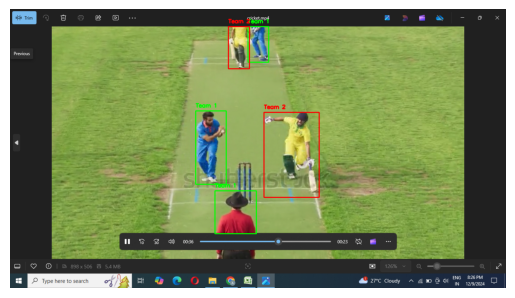

In [ ]:
annotated_image = image_rgb.copy()

for i, box in enumerate(person_boxes):
    x1, y1, x2, y2 = map(int, box)
    color = (0, 255, 0) if team_labels[i] == 0 else (255, 0, 0)  # Assign colors to teams
    cv2.rectangle(annotated_image, (x1, y1), (x2, y2), color, 2)
    cv2.putText(annotated_image, f"Team {team_labels[i] + 1}", (x1, y1 - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

# Show the image
plt.imshow(annotated_image)
plt.axis('off')
plt.show()


HOW MANY PLAYERS ARE THERE DETECTED AND HOW MANY TEAM ARE THERE DETECTED BY CLUSTERING THROUGH COLOR

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('IPL23dataset.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())


   Match Number                     Date  \
0            63   16th May 2023, Tuesday   
1            62    15th May 2023, Monday   
2            61    14th May 2023, Sunday   
3            60    14th May 2023, Sunday   
4            59  13th May 2023, Saturday   

                                               Venue                Team1  \
0  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...       Mumbai Indians   
1                  Narendra Modi Stadium,  Ahmedabad       Gujarat Titans   
2                   MA Chidambaram Stadium,  Chennai  Chennai Super Kings   
3                    Sawai Mansingh Stadium,  Jaipur     Rajasthan Royals   
4                       Arun Jaitley Stadium,  Delhi       Delhi Capitals   

                         Team2 Toss winning team Toss Decision  \
0         Lucknow Super Giants               MI           bowl   
1          Sunrisers Hyderabad              SRH           bowl   
2        Kolkata Knight Riders              CSK            bat   
3  Royal

TOTAL CONTENT OF CSV FILE DISPLAYED BASED ON THIS PREDICATION PROCESS IS DONE

In [ ]:
# Handle missing values
df = df.dropna()

# Encode categorical variables
df['Team1'] = df['Team1'].astype('category').cat.codes
df['Team2'] = df['Team2'].astype('category').cat.codes
df['Venue'] = df['Venue'].astype('category').cat.codes


<ipython-input-22-6c068b66e2e1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Team1'] = df['Team1'].astype('category').cat.codes
<ipython-input-22-6c068b66e2e1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Team2'] = df['Team2'].astype('category').cat.codes
<ipython-input-22-6c068b66e2e1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

In [ ]:
print(X_train.dtypes)


Team1              int8
Team2              int8
Venue              int8
Toss Decision    object
dtype: object


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
df = pd.read_csv('IPL23dataset.csv')  # Replace with your actual file name

# Display the first few rows of the dataset
print(df.head())

# Check for null values
print(df.isnull().sum())

# Data info
print(df.info())


   Match Number                     Date  \
0            63   16th May 2023, Tuesday   
1            62    15th May 2023, Monday   
2            61    14th May 2023, Sunday   
3            60    14th May 2023, Sunday   
4            59  13th May 2023, Saturday   

                                               Venue                Team1  \
0  Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...       Mumbai Indians   
1                  Narendra Modi Stadium,  Ahmedabad       Gujarat Titans   
2                   MA Chidambaram Stadium,  Chennai  Chennai Super Kings   
3                    Sawai Mansingh Stadium,  Jaipur     Rajasthan Royals   
4                       Arun Jaitley Stadium,  Delhi       Delhi Capitals   

                         Team2 Toss winning team Toss Decision  \
0         Lucknow Super Giants               MI           bowl   
1          Sunrisers Hyderabad              SRH           bowl   
2        Kolkata Knight Riders              CSK            bat   
3  Royal

In [ ]:
# Fill missing values or drop rows with missing data
df['Second Innings Score'].fillna('0/0', inplace=True)
df['Overs in Second innings'].fillna(0, inplace=True)
df['Won By'].fillna('Unknown', inplace=True)

# Ensure correct data types for scores if needed
# (e.g., Split 'First Innings Score' into runs and wickets if needed)


<ipython-input-40-cacc1c70a1a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Second Innings Score'].fillna('0/0', inplace=True)
<ipython-input-40-cacc1c70a1a9>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

<ipython-input-41-b5d400676f47>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Venue', palette='viridis', order=df['Venue'].value_counts().index)


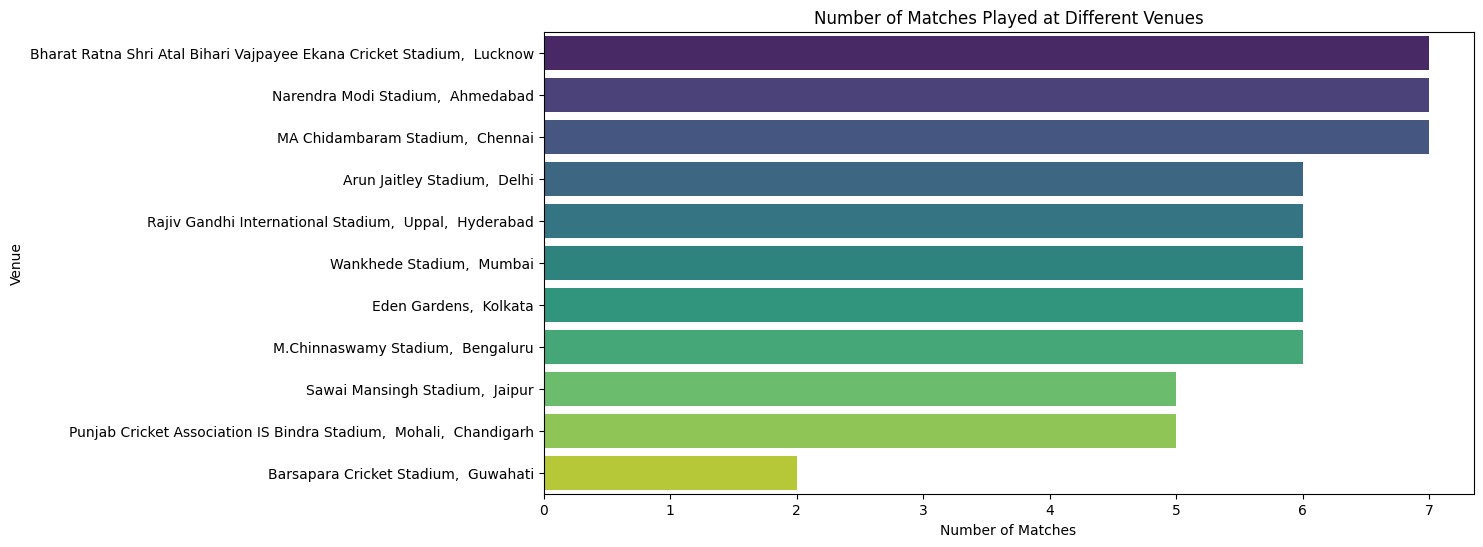

In [ ]:
# Countplot for matches at each venue
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='Venue', palette='viridis', order=df['Venue'].value_counts().index)
plt.title('Number of Matches Played at Different Venues')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()


COMPARING THE MATCHES PLAYED AT DIFFERENT VENUES

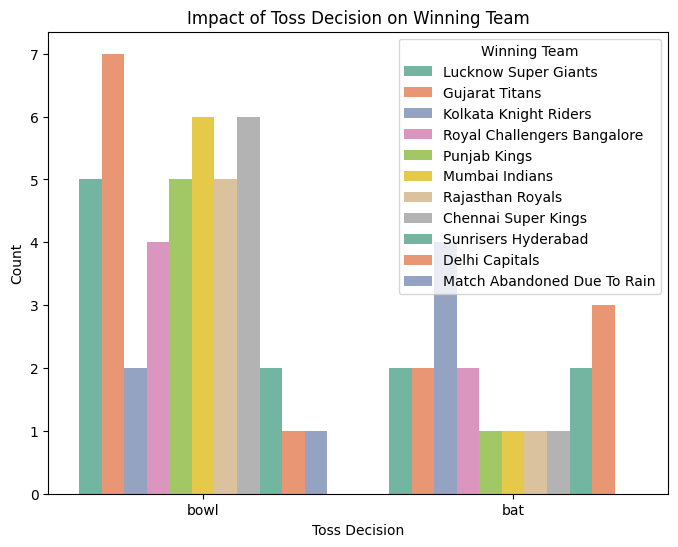

In [ ]:
# Toss decision (bat or field)
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Toss Decision', hue='Winning Team', palette='Set2')
plt.title('Impact of Toss Decision on Winning Team')
plt.xlabel('Toss Decision')
plt.ylabel('Count')
plt.legend(title='Winning Team')
plt.show()


HERE WE WILL GET THE CONCLUSION

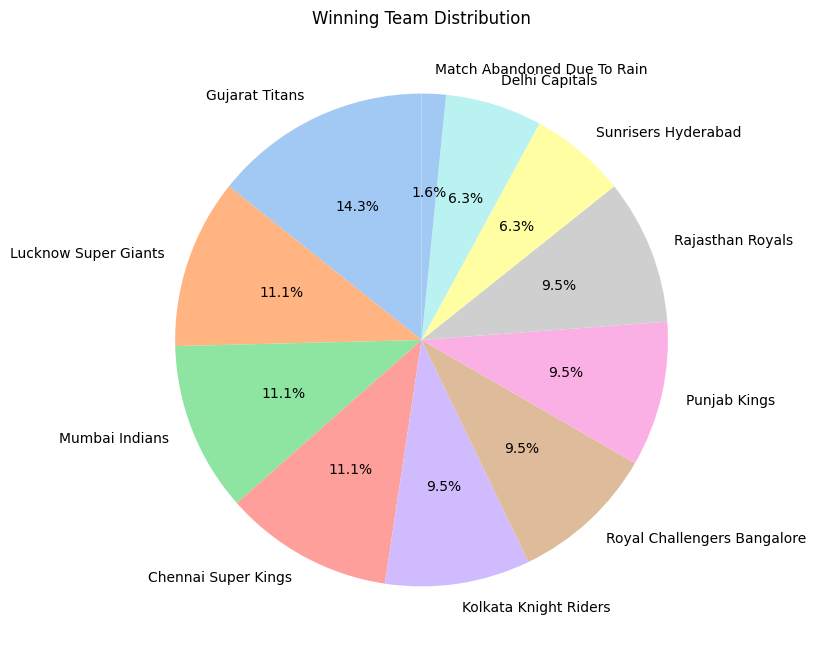

In [ ]:
# Pie chart of winning teams
winning_teams = df['Winning Team'].value_counts()

plt.figure(figsize=(8, 8))
winning_teams.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Winning Team Distribution')
plt.ylabel('')  # Remove y-axis label
plt.show()


In [ ]:
# Remove non-numeric characters (like '*') from the score
df['First Innings Runs'] = df['First Innings Score'].str.extract('(\d+)').astype(int)

# Verify the cleaned column
print(df['First Innings Runs'].head())



0    177
1    188
2    144
3    171
4    167
Name: First Innings Runs, dtype: int64


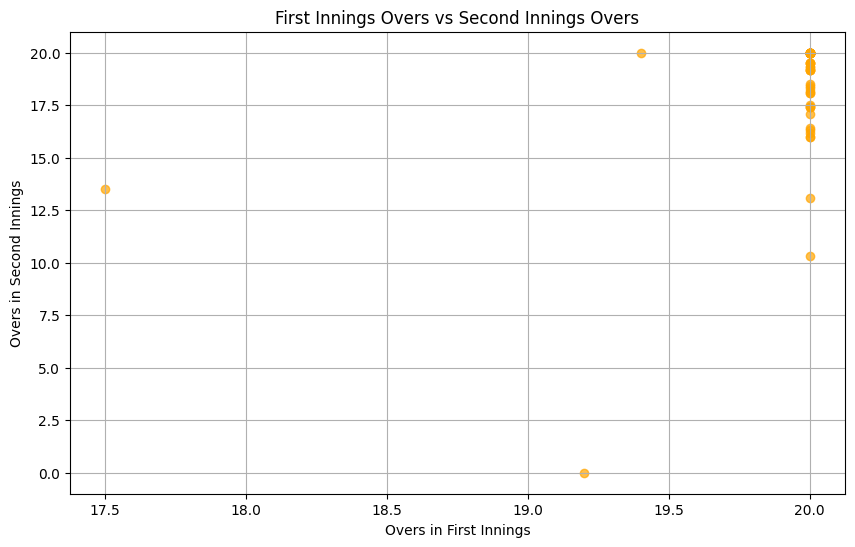

In [ ]:
# Scatter plot of overs in first vs second innings
plt.figure(figsize=(10, 6))
plt.scatter(df['Overs in First innings'], df['Overs in Second innings'], color='orange', alpha=0.7)
plt.title('First Innings Overs vs Second Innings Overs')
plt.xlabel('Overs in First Innings')
plt.ylabel('Overs in Second Innings')
plt.grid()
plt.show()


In [ ]:
# Save a visualization
plt.savefig('winning_team_distribution.png', dpi=300)  # Example of saving the pie chart


<Figure size 640x480 with 0 Axes>

In [ ]:
winning_counts = df['Winning Team'].value_counts()
total_matches = df['Team1'].value_counts() + df['Team2'].value_counts()
win_percentage = (winning_counts / total_matches) * 100
print(win_percentage)


Chennai Super Kings             53.846154
Delhi Capitals                  33.333333
Gujarat Titans                  69.230769
Kolkata Knight Riders           46.153846
Lucknow Super Giants            53.846154
Match Abandoned Due To Rain           NaN
Mumbai Indians                  53.846154
Punjab Kings                    50.000000
Rajasthan Royals                46.153846
Royal Challengers Bangalore     54.545455
Royals Challengers Bangalore          NaN
Sunriders Hyderabad                   NaN
Sunrisers Hyderabad             40.000000
Sunrises Hyderabad                    NaN
Name: count, dtype: float64


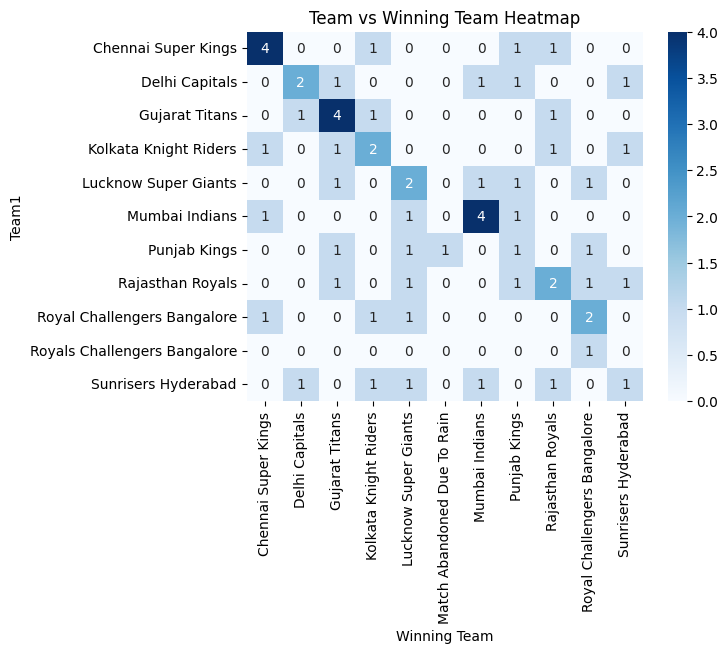

In [ ]:
pivot_table = pd.crosstab(df['Team1'], df['Winning Team'])
sns.heatmap(pivot_table, annot=True, cmap='Blues')
plt.title('Team vs Winning Team Heatmap')
plt.show()
